In [29]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLyearQCL = pd.read_csv('queries_results/global/GLOBAL year quadcl count.csv', header = 0)
quadcodes = pd.DataFrame({'QuadClass': [1, 2, 3, 4], 'QuadDescription': ['Verbal Cooperation', 'Material Cooperation', 'Verbal Conflict','Material Conflict']})
GLyearQCL = GLyearQCL.merge(quadcodes.set_index('QuadClass'), on='QuadClass', how='left')

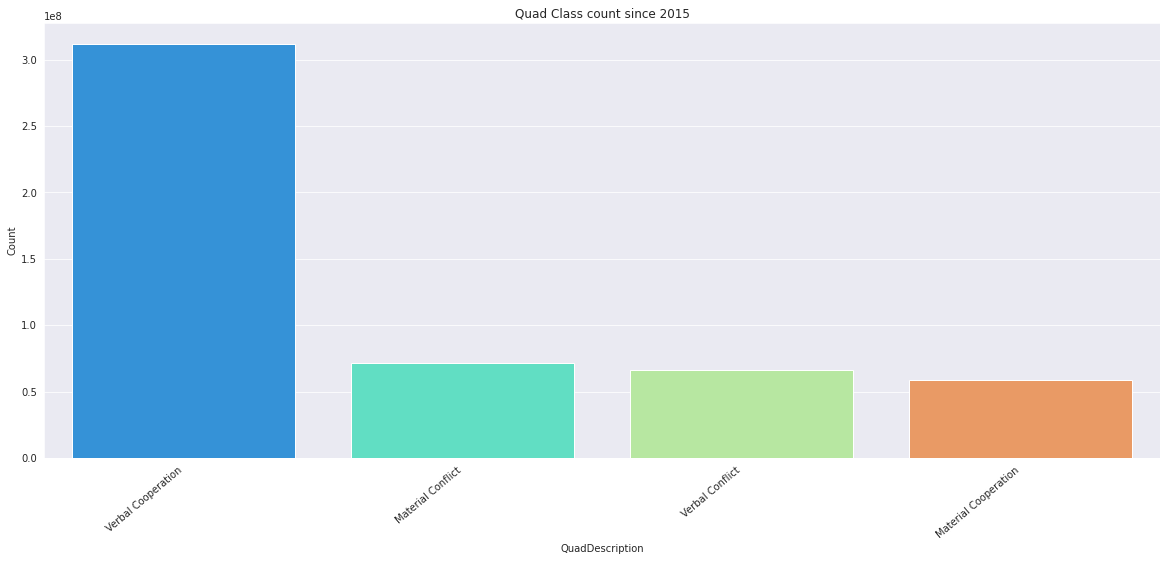

In [30]:
s = GLyearQCL.groupby("QuadDescription", as_index=False).sum().sort_values(by="Count", ascending=False).head(30)
g = sns.barplot(s.QuadDescription, s.Count, palette='rainbow')
g.set_title("Quad Class count since 2015")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)

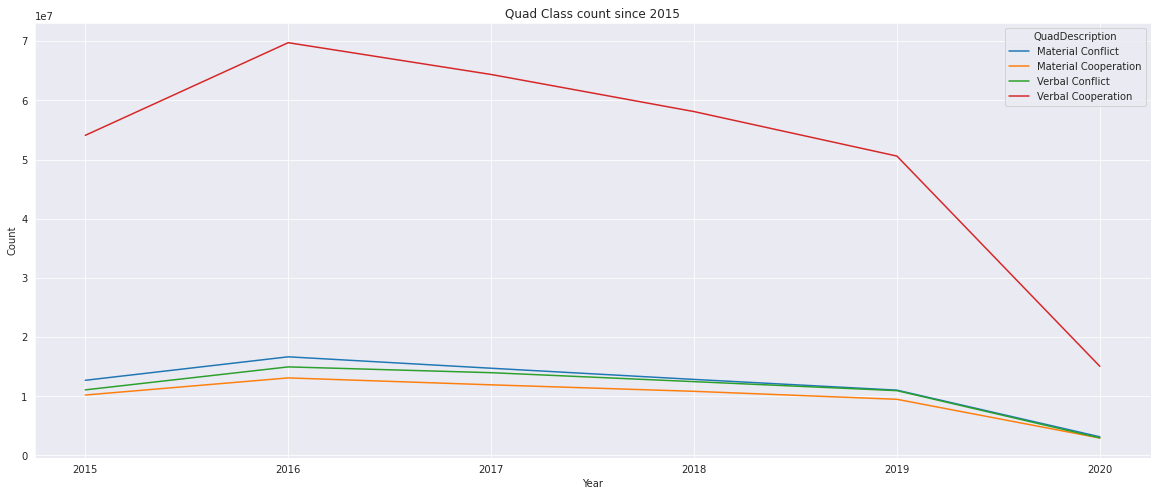

In [31]:
s = GLyearQCL.groupby(["QuadDescription", "Year"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("Year").head(20)
s = s.groupby(["Year","QuadDescription"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Quad Class count since 2015")
g.figure.set_size_inches(20,8)

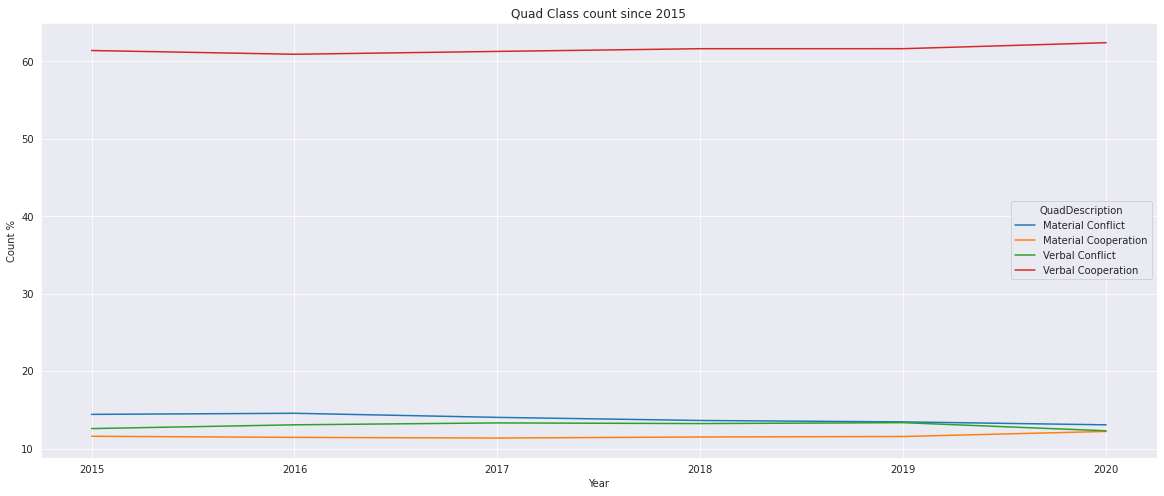

In [32]:
s = GLyearQCL.groupby(["QuadDescription", "Year"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("Year").head(20)
s = s.groupby(["Year","QuadDescription"]).agg({'Count':'sum'})

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Quad Class count since 2015")
g.figure.set_size_inches(20,8)